## Import necessary libraries for data handling, visualization, modeling, and evaluation

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix

## Load preprocessed training, validation, and test datasets


In [6]:
# Load data
X_train = np.load('./data/X_train.npy')
Y_train = np.load('./data/Y_train.npy')
X_valid = np.load('./data/X_valid.npy')
Y_valid = np.load('./data/Y_valid.npy')
X_test = np.load('./data/X_test.npy')
Y_test = np.load('./data/Y_test.npy')

## Define the Convolutional Neural Network (CNN) architecture
First build a really small model so we can build a baseline model and understand the data and the model better. Small models tend to generalize better. We can also verify that the pipeline works and it makes the debugging easier. This model has 63617 parameters which is considered  small. I chose relu, because of its non-linearity, so the model cna learn more complex features, and its the standard for CNNs. The sigmoid function puts the output to (0, 1), which is perfect for image classification


In [7]:
# Define model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid') 
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

## Compile the CNN model, set up early stopping, and train the model


In [8]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=3,
                           restore_best_weights=True)

# Train model
history = model.fit(X_train, Y_train,
                    validation_data=(X_valid, Y_valid),
                    epochs=12,
                    batch_size=32,
                    callbacks=[early_stop])

Epoch 1/12
946/946 ━━━━━━━━━━━━━━━━━━━━ 362s 381ms/step - accuracy: 0.8574 - loss: 0.3027 - val_accuracy: 0.8784 - val_loss: 0.2787
Epoch 2/12
946/946 ━━━━━━━━━━━━━━━━━━━━ 345s 364ms/step - accuracy: 0.9404 - loss: 0.1577 - val_accuracy: 0.9506 - val_loss: 0.1295
Epoch 3/12
946/946 ━━━━━━━━━━━━━━━━━━━━ 369s 390ms/step - accuracy: 0.9507 - loss: 0.1301 - val_accuracy: 0.9608 - val_loss: 0.1019
Epoch 4/12
946/946 ━━━━━━━━━━━━━━━━━━━━ 369s 390ms/step - accuracy: 0.9597 - loss: 0.1087 - val_accuracy: 0.9494 - val_loss: 0.1450
Epoch 5/12
946/946 ━━━━━━━━━━━━━━━━━━━━ 376s 398ms/step - accuracy: 0.9601 - loss: 0.1068 - val_accuracy: 0.9619 - val_loss: 0.1118
Epoch 6/12
946/946 ━━━━━━━━━━━━━━━━━━━━ 362s 383ms/step - accuracy: 0.9635 - loss: 0.0980 - val_accuracy: 0.9624 - val_loss: 0.1116


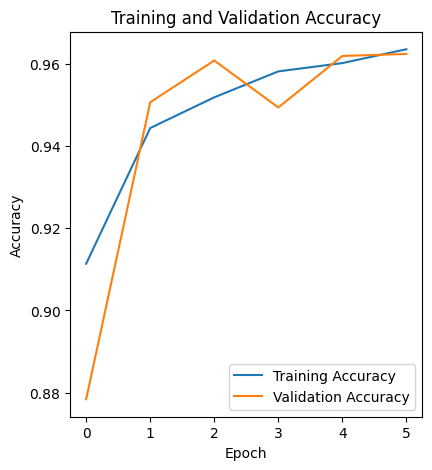

In [9]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


### Training
* Fast learning early
* High performance
* No overfitting


### Show 4-4 misclassified images. 
### 0: No fire
### 1: Fire

197/197 ━━━━━━━━━━━━━━━━━━━━ 16s 81ms/step

Number of misclassified images: 176

Misclassified Images:


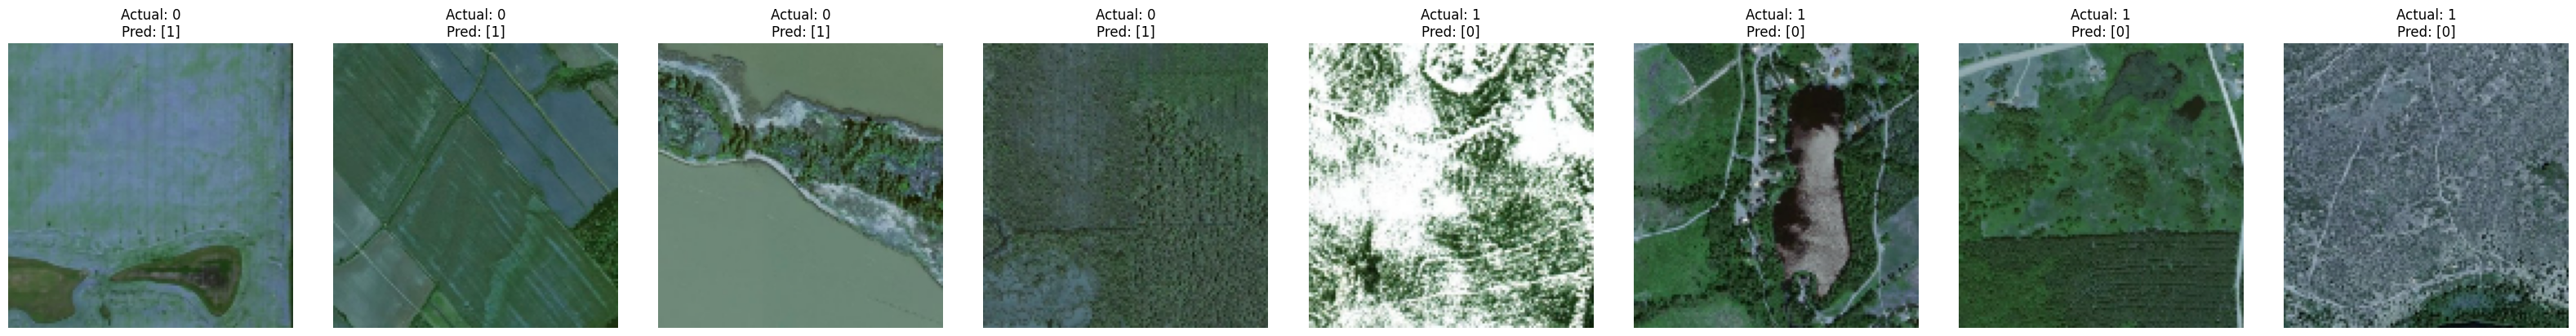

In [10]:
# Predict class labels (0 or 1)
y_pred = (model.predict(X_test) > 0.5).astype(int)

misclassified_indices = np.where(y_pred.flatten() != Y_test)[0]
num_misclassified = len(misclassified_indices)
print(f"\nNumber of misclassified images: {num_misclassified}")

if num_misclassified > 0:
    print("\nMisclassified Images:")

    # Split misclassified by class
    class_0_indices = [idx for idx in misclassified_indices if Y_test[idx] == 0]
    class_1_indices = [idx for idx in misclassified_indices if Y_test[idx] == 1]

    # Select up to 4 from each
    class_0_to_show = class_0_indices[:4]
    class_1_to_show = class_1_indices[:4]

    all_to_show = class_0_to_show + class_1_to_show
    num_to_show = len(all_to_show)

    fig, axes = plt.subplots(1, num_to_show, figsize=(4 * num_to_show, 4))

    # Always make axes iterable
    if num_to_show == 1:
        axes = [axes]

    for i, index in enumerate(all_to_show):
        axes[i].imshow(X_test[index], cmap='gray')
        axes[i].set_title(f"Actual: {Y_test[index]}\nPred: {y_pred[index]}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No misclassified images found.")


### The smaller cant capture the more complex patterns

## Evaluate the model on the test set, show metrics, plot confusion matrix, and save the model


197/197 ━━━━━━━━━━━━━━━━━━━━ 19s 97ms/step - accuracy: 0.9738 - loss: 0.0709
Test Accuracy: 0.97
197/197 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step

Classification Report:
              precision    recall  f1-score   support

           0     0.9645    0.9734    0.9689      2820
           1     0.9783    0.9710    0.9746      3480

    accuracy                         0.9721      6300
   macro avg     0.9714    0.9722    0.9718      6300
weighted avg     0.9721    0.9721    0.9721      6300



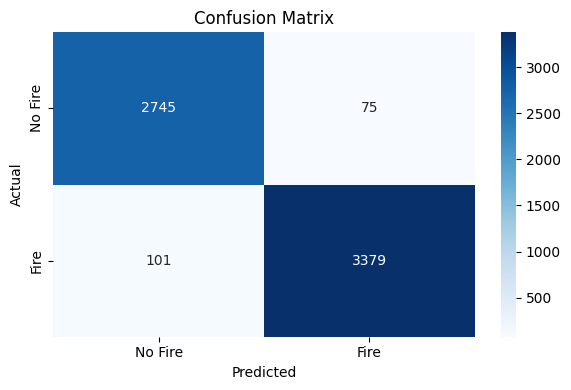

Model saved to ./odel.h5


In [11]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Metrics
print("\nClassification Report:")
print(classification_report(Y_test, y_pred, digits=4))

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Fire", "Fire"], yticklabels=["No Fire", "Fire"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

model.save('./model.h5')
print("Model saved to ./odel.h5")


## Conclusions

* Too large model for real time video detection
* Really accurate wildfire detection
* Still has some problem distinguishing clouds from smoke.
* Effective generalization